In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [308]:
def get_lambda(n):
    return 0.5*(n/(n+1))

def get_eta(n):
    return pow(0.5,1/n)


def get_lambda_k(n,k):
    sums = 0.0
    for i in range(k):
        sums += (n-i)/(n+1)
    return 0.5 * (sums/k)

def get_ratio_k(n,k):
    sums = 0.0
    for i in range(k):
        sums += (n-i)/(n+1)
    return sums
    
        

def run_prophet(n,thres):
    for i in range(n):
        X = np.random.uniform()
        if X > thres:
            return X
    return X


def run_prophet_k(n,k,thres):
    X_list = []
    XX = []
    for i in range(n):
        X = np.random.uniform()
        XX.append(X)
        if X > thres:
            X_list.append(X)
        if len(X_list) == k:
            #print("1",sum(X_list))
            return sum(X_list)
    if len(X_list) < k:
        for i in range(n-1,-1,-1):
            X_list.append(XX[i])
            if len(X_list) == k:
                #print("2",sum(X_list))
                return sum(X_list)


In [342]:
N = [32,50,100,200,400,800,1000]
k = 16
trials = 50000
ALG_lam_k = np.zeros((len(N),trials))
for j in tqdm(range(len(N))):
    n = N[j]
    prophet_k = get_ratio_k(n,k)
    for i in (range(trials)):
        lam = get_lambda_k(n,2)
        ALG_lam_k[j,i] = run_prophet_k(n,k,lam)/prophet_k


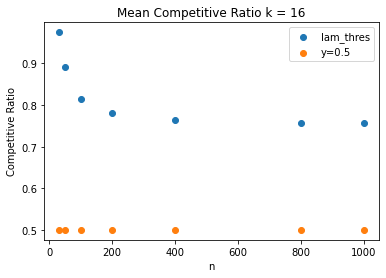

In [343]:
plt.scatter(N,np.mean(ALG_lam_k,axis=1),label = 'lam_thres')
plt.scatter(N,np.ones(len(N))*0.5, label = 'y=0.5')
plt.xlabel('n')
plt.ylabel('Competitive Ratio')
plt.title("Mean Competitive Ratio k = "+str(k))
plt.legend()
plt.savefig('675_q2.1_'+str(k)+'.pdf')

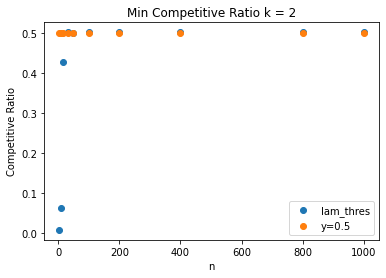

In [336]:
plt.scatter(N,np.min(ALG_lam_k,axis=1),label = 'lam_thres')
plt.scatter(N,np.ones(len(N))*0.5, label = 'y=0.5')
plt.xlabel('n')
plt.ylabel('Competitive Ratio')
plt.title("Min Competitive Ratio k = "+str(k))
plt.legend()
plt.savefig('675_q2.min_'+str(k)+'.pdf')

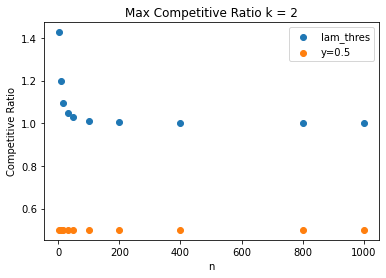

In [337]:
plt.scatter(N,np.max(ALG_lam_k,axis=1),label = 'lam_thres')
plt.scatter(N,np.ones(len(N))*0.5, label = 'y=0.5')
plt.xlabel('n')
plt.ylabel('Competitive Ratio')
plt.title("Max Competitive Ratio k = "+str(k))
plt.legend()
plt.savefig('675_q2.max_'+str(k)+'.pdf')

In [240]:
N = [2,4,8,16,32,50,100,200,400,800,1000]
trials = 50000
ALG_lam = np.zeros((len(N),trials))
ALG_eta = np.zeros((len(N),trials))
for j in tqdm(range(len(N))):
    n = N[j]
    for i in (range(trials)):
        lam = get_lambda(n)
        eta = get_eta(n)
        ALG_lam[j,i] = run_prophet(n,lam)
        ALG_eta[j,i] = run_prophet(n,eta) 

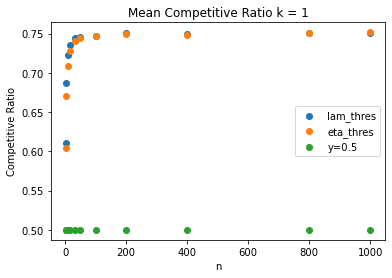

In [244]:
plt.scatter(N,np.mean(ALG_lam,axis=1)/(n/(n+1)),label = 'lam_thres')
plt.scatter(N,np.mean(ALG_eta,axis=1)/(n/(n+1)),label = 'eta_thres')
plt.scatter(N,np.ones(len(N))*0.5, label = 'y=0.5')
plt.xlabel('n')
plt.ylabel('Competitive Ratio')
plt.title("Mean Competitive Ratio k = 1")
plt.legend()
plt.savefig('675_q2.1.pdf')

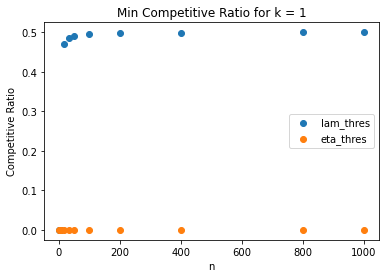

In [245]:
plt.scatter(N,np.min(ALG_lam,axis=1)/(n/(n+1)),label = 'lam_thres')
plt.scatter(N,np.min(ALG_eta,axis=1)/(n/(n+1)),label = 'eta_thres')
plt.xlabel('n')
plt.ylabel('Competitive Ratio')
plt.title("Min Competitive Ratio for k = 1")
plt.legend()
plt.savefig('675_q2.1_min.pdf')

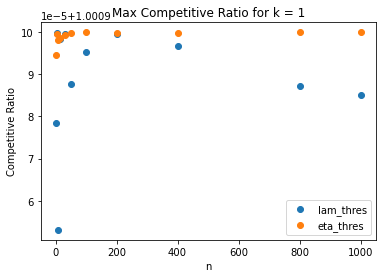

In [246]:
plt.scatter(N,np.max(ALG_lam,axis=1)/(n/(n+1)),label = 'lam_thres')
plt.scatter(N,np.max(ALG_eta,axis=1)/(n/(n+1)),label = 'eta_thres')
plt.xlabel('n')
plt.ylabel('Competitive Ratio')
plt.title("Max Competitive Ratio for k = 1")
plt.legend()
plt.savefig('675_q2.1_max.pdf')

In [247]:
len([])

0

In [297]:
prophet_k

1.7272727272727273